In [5]:
# google colab mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wheat_Seeds.csv")

In [29]:
# Select the first two columns as features (X) and the last column as target (Y)
# We're reshaping X to be a 2D array, which it already is after selecting two columns
X = df.iloc[:, [0, 1]].values
Y = df.iloc[:, -1].values

# Binarize the target variable: 1 if original class is 1, 0 otherwise
Y = (Y == 1).astype(int)

Now, we will apply feature normalization and add a bias term, similar to your provided code.

In [30]:
# Feature Normalization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# Add bias term (intercept) to X_norm
X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]


Here are the sigmoid, loss, and gradient functions, and the training loop for logistic regression, adapted to use your dataset.

In [31]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def compute_loss(X, y, theta):
  y_hat = sigmoid(X @ theta)
  eps = 1e-8 # A small constant to prevent log(0)
  return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

def compute_gradient(X, y, theta):
  y_hat = sigmoid(X @ theta)
  return (1 / len(y)) * X.T @ (y_hat - y.reshape(-1, 1))

In [32]:


# Initialize parameters
np.random.seed(42) # Using a different seed for consistency with previous work
theta = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.1
epochs = 1000

loss_history = []
for epoch in range(epochs):
  gradients = compute_gradient(X_b, Y, theta)
  theta = theta - learning_rate * gradients
  loss = compute_loss(X_b, Y, theta)
  loss_history.append(loss)
print(f"\nFinal Theta: \n{theta.flatten()}")


Final Theta: 
[-0.72334013 -0.06793263 -0.23281927]


Let's visualize the training convergence and the decision boundary.

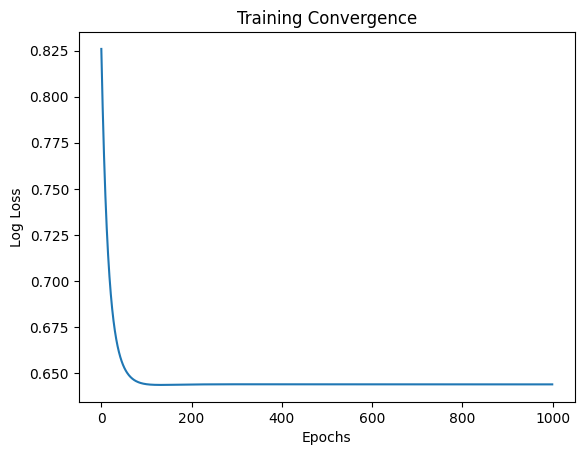

In [33]:
plt.figure()

# plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training Convergence")
plt.show()
# plt.grid(True)



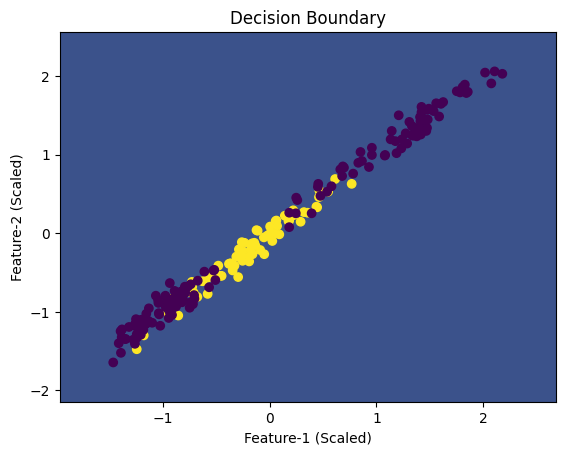

In [34]:
# Plotting Decision Boundary
x_min, x_max = X_norm[:,0].min() - 0.5, X_norm[:,0].max() + 0.5
y_min, y_max = X_norm[:,1].min() - 0.5, X_norm[:,1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
probs = sigmoid(grid @ theta).reshape(xx.shape)

# plt.subplot(1, 2, 2)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1])
plt.scatter(X_norm[:,0], X_norm[:,1], c=Y)
plt.title("Decision Boundary")
plt.xlabel("Feature-1 (Scaled)")
plt.ylabel("Feature-2 (Scaled)")
plt.show()



In [35]:
# Evaluate the model
y_pred = (sigmoid(X_b @ theta) >= 0.5).astype(int).flatten()
accuracy = np.mean(y_pred == Y)

print("Classification Accuracy:", accuracy)

Classification Accuracy: 0.6698564593301436
